<a href="https://colab.research.google.com/github/ChiomaO15/ChiomaO15/blob/main/ORNAMENTAL_FISH_RECOGNITION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING DATASET**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.4 MB/s e

In [3]:
pip install imutils

In [4]:
from imutils import paths
import cv2

In [5]:
imagePaths = list(paths.list_images('/content/drive/MyDrive/ornamental fishes'))

In [6]:
imagePaths

['/content/drive/MyDrive/ornamental fishes/Goldfish/download.jpg',
 '/content/drive/MyDrive/ornamental fishes/Goldfish/download (1).jpg',
 '/content/drive/MyDrive/ornamental fishes/Goldfish/images.jpg',
 '/content/drive/MyDrive/ornamental fishes/Goldfish/images (1).jpg',
 '/content/drive/MyDrive/ornamental fishes/Goldfish/images (2).jpg',
 '/content/drive/MyDrive/ornamental fishes/Goldfish/images (3).jpg',
 '/content/drive/MyDrive/ornamental fishes/Goldfish/images (4).jpg',
 '/content/drive/MyDrive/ornamental fishes/Goldfish/images (5).jpg',
 '/content/drive/MyDrive/ornamental fishes/Goldfish/images (6).jpg',
 '/content/drive/MyDrive/ornamental fishes/Goldfish/images (7).jpg',
 '/content/drive/MyDrive/ornamental fishes/Goldfish/images (8).jpg',
 '/content/drive/MyDrive/ornamental fishes/Koi fish/download (2).jpg',
 '/content/drive/MyDrive/ornamental fishes/Koi fish/download.jpg',
 '/content/drive/MyDrive/ornamental fishes/Koi fish/images.jpg',
 '/content/drive/MyDrive/ornamental fishes

In [7]:
import os
import numpy as np
import PIL
import cv2

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

**LOADING THE ORNAMENTAL FISH DATA**

In [8]:
dirs = os.listdir('/content/drive/MyDrive/ornamental fishes')
for dir in dirs:
  print(dir)

Goldfish
Koi fish
Platy fish


In [9]:
base_dir = '/content/drive/MyDrive/ornamental fishes'
img_size = 224
batch = 32

**SEPARATING THE TRAINING SET AND VALIDATION SET**

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                        seed =123,
                                                        validation_split=0.2,
                                                        subset='training',
                                                        batch_size=batch,
                                                        image_size = (img_size, img_size))

val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                      seed=123,
                                                      validation_split=0.2,
                                                      subset='validation',
                                                      batch_size = batch,
                                                      image_size = (img_size,img_size))

Found 39 files belonging to 3 classes.
Using 32 files for training.
Found 39 files belonging to 3 classes.
Using 7 files for validation.


In [11]:
ornfish_name = train_ds.class_names
ornfish_name

['Goldfish', 'Koi fish', 'Platy fish']

**PLOTING THE DATA USING MATPLOTLIB**

In [12]:
import matplotlib.pyplot as plt

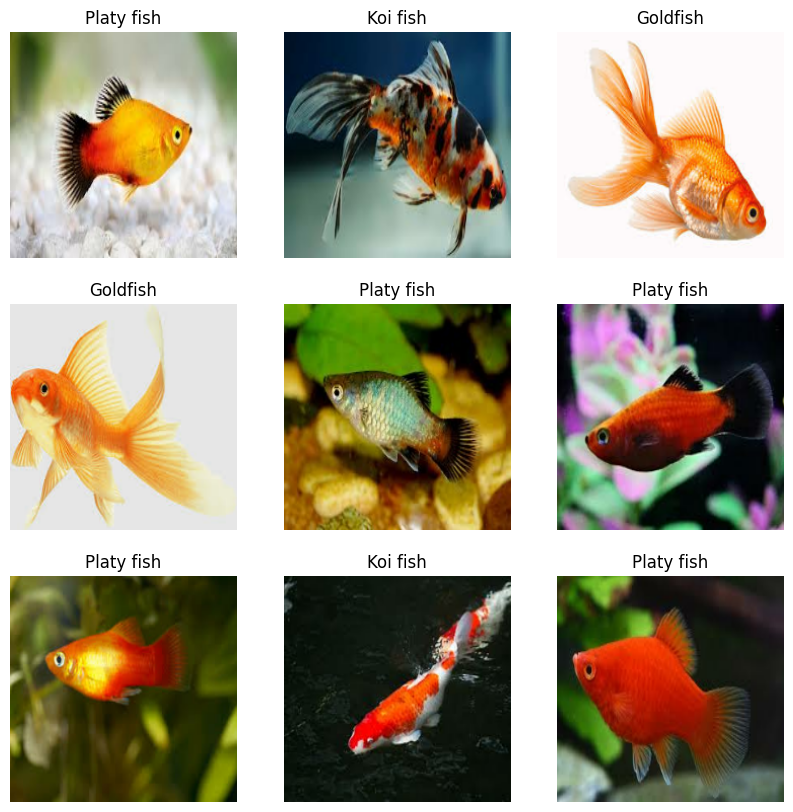

In [13]:
plt.figure(figsize =(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(ornfish_name[labels[i]])
        plt.axis('off')

**IMPROVING THE MODEL USING AUTOTUNE**

In [14]:
AUTOTUNE = tf.data.AUTOTUNE

In [15]:
train_ds = train_ds.cache().shuffle(250).prefetch(buffer_size=AUTOTUNE)

In [16]:
val_ds = val_ds.cache().prefetch(buffer_size= AUTOTUNE)

**DATA AUGUMENTATION OF MODEL**

In [17]:
data_augmentation = Sequential ([
layers.RandomFlip("horizontal", input_shape=(img_size, img_size)),
layers.RandomRotation(0.1),
layers.RandomZoom(0.1),
])

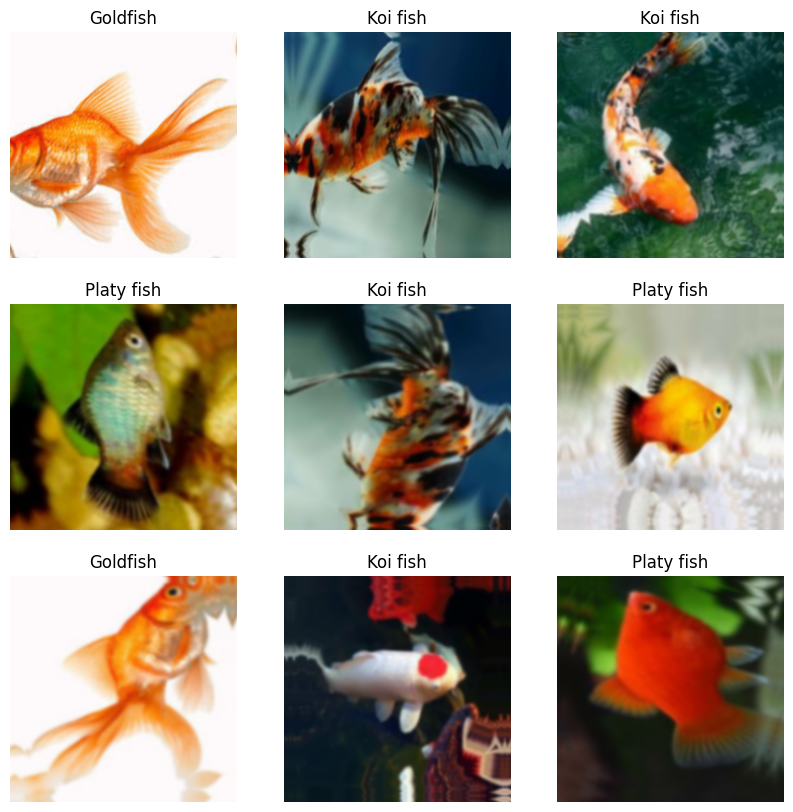

In [18]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_size, img_size)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# Initialize the variable with the Sequential model
# This assumes that the layers and img_size variables are defined and accessible

i = 0
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)  # Corrected variable name
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(ornfish_name[labels[i]])
        plt.axis('off')

**CREATE THE MODEL**

In [19]:
# Check the shape of the input data
input_shape = images.shape

# If the input data only has 3 dimensions, add an additional dimension
if len(input_shape) == 3:
    images = images.reshape((images.shape[0], images.shape[1], images.shape[2], 1))

In [20]:
# Check the shape of the input data
input_shape = images.shape

# If the input data only has 3 dimensions, add an additional dimension
if len(input_shape) == 3:
    images = images.reshape((images.shape[0], images.shape[1], images.shape[2], 1))

# Initialize the data_augmentation layer with the correct input shape
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 1)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# Build the model
model = Sequential([
    layers.InputLayer(input_shape=(img_size, img_size, 3)),  # Add a channel dimension
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3)
])

In [21]:
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 224, 224, 1)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                 

**FITTING THE MODEL**

In [23]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
1/1 [==============================] - 5s 5s/step - loss: 1.1067 - accuracy: 0.2812 - val_loss: 2.0296 - val_accuracy: 0.1429
Epoch 2/15
1/1 [==============================] - 3s 3s/step - loss: 1.8835 - accuracy: 0.4688 - val_loss: 1.0647 - val_accuracy: 0.7143
Epoch 3/15
1/1 [==============================] - 3s 3s/step - loss: 1.5947 - accuracy: 0.4062 - val_loss: 1.0984 - val_accuracy: 0.4286
Epoch 4/15
1/1 [==============================] - 2s 2s/step - loss: 1.5122 - accuracy: 0.3438 - val_loss: 0.9527 - val_accuracy: 0.4286
Epoch 5/15
1/1 [==============================] - 2s 2s/step - loss: 1.0312 - accuracy: 0.3438 - val_loss: 0.9402 - val_accuracy: 0.5714
Epoch 6/15
1/1 [==============================] - 2s 2s/step - loss: 0.9286 - accuracy: 0.6562 - val_loss: 0.9109 - val_accuracy: 0.7143
Epoch 7/15
1/1 [==============================] - 2s 2s/step - loss: 0.8662 - accuracy: 0.6250 - val_loss: 0.8346 - val_accuracy: 0.7143
Epoch 8/15
1/1 [=========================

**TRAINING THE MODEL**

In [24]:
input_image = tf.keras.utils.load_img('/content/drive/MyDrive/ornamental fishes/Koi fish/images (10).jpg', target_size=(224,224))
input_image_array = tf.keras.utils.img_to_array(input_image)
input_image_exp_dim = tf.expand_dims(input_image_array, axis=0)

predictions = model.predict(input_image_exp_dim)
result = tf.nn.softmax(predictions[0])
ornfish_name[np.argmax(result)]

1/1 [==============================] - 0s 273ms/step


'Koi fish'

In [25]:
input_image = tf.keras.utils.load_img('/content/drive/MyDrive/ornamental fishes/Platy fish/download (2).jpg', target_size=(224,224))
input_image_array = tf.keras.utils.img_to_array(input_image)
input_image_exp_dim = tf.expand_dims(input_image_array, axis=0)

predictions = model.predict(input_image_exp_dim)
result = tf.nn.softmax(predictions[0])
ornfish_name[np.argmax(result)]

1/1 [==============================] - 0s 56ms/step


'Platy fish'

In [26]:
def classify_images(image_path):
  input_image = tf.keras.utils.load_img(image_path, target_size=(224,224))
  input_image_array = tf.keras.utils.img_to_array(input_image)
  input_image_exp_dim = tf.expand_dims(input_image_array, axis=0)

  predictions = model.predict(input_image_exp_dim)
  result = tf.nn.softmax(predictions[0])
  outcome = 'The Image belongs to ' + ornfish_name[np.argmax(result)] + ' with a score of ' + str(np.max(result)*100)
  return outcome

In [27]:
classify_images('/content/drive/MyDrive/ornamental fishes/Platy fish/download (3).jpg')

1/1 [==============================] - 0s 61ms/step


'The Image belongs to Platy fish with a score of 93.6499297618866'

In [28]:
model.save('Ornamentalfishes_Recog_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
def predict_input_image(img):
  img_4d=img.reshape(-1,224,224,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

 **TESTING MODEL ON GRADIO**

In [32]:
!pip install -q gradio torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 52.3 MB/s eta 0:00:00


In [33]:
# Downloading files from the demo repo
import os
!wget -q https://github.com/gradio-app/gradio/raw/main/demo/image_classification/Goldfish.jpg

In [34]:
import gradio as gr
import torch
import requests
from torchvision import transforms

model = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=True).eval()
response = requests.get("https://git.io/JJkYN")
labels = response.text.split("\n")

def predict(inp):
  inp = transforms.ToTensor()(inp).unsqueeze(0)
  with torch.no_grad():
    prediction = torch.nn.functional.softmax(model(inp)[0], dim=0)
    confidences = {labels[i]: float(prediction[i]) for i in range(1000)}
  return confidences

demo = gr.Interface(fn=predict,
             inputs=gr.Image(type="pil"),
             outputs=gr.Label(num_top_classes=3),
             examples=[["Goldfish.jpg"]],
             )

demo.launch()

Downloading: "https://github.com/pytorch/vision/zipball/v0.6.0" to /root/.cache/torch/hub/v0.6.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 43.7MB/s]


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://fb3039672805c5ebea.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
